In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small
License(s): copyright-authors
fashion-product-images-small.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fashion-product-images-small.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/fashion-product-images-small.zip' mode='r'>>

In [ ]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [ ]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
# filenames[0]
len(filenames)

44441

In [ ]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_1 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
inputImage = '/content/1535.jpg'

In [ ]:
img = image.load_img(inputImage, target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 [==============================] - 1s 1s/step


array([0.        , 0.010004  , 0.        , ..., 0.00909983, 0.        ,
       0.01710445], dtype=float32)

In [71]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

extract_features_from_images(filenames[0], model)

1/1 [==============================] - 0s 348ms/step


array([0.        , 0.02933962, 0.01419764, ..., 0.0032832 , 0.0160491 ,
       0.01141499], dtype=float32)

In [ ]:
image_features = []
for file in filenames:
    image_features.append(extract_features_from_images(file, model))
image_features

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 25ms/step


[array([0.0006535 , 0.05061937, 0.00520526, ..., 0.00012125, 0.03224609,
        0.03321084], dtype=float32),
 array([0.        , 0.03727016, 0.00053701, ..., 0.00600365, 0.00842171,
        0.03114458], dtype=float32),
 array([0.00711579, 0.00679839, 0.00768135, ..., 0.01926187, 0.04550768,
        0.0886005 ], dtype=float32),
 array([0.        , 0.01645423, 0.00179518, ..., 0.02595383, 0.02810092,
        0.00022438], dtype=float32),
 array([0.00605398, 0.02571227, 0.00220637, ..., 0.00739007, 0.01643502,
        0.04091065], dtype=float32),
 array([0.0018302 , 0.01164736, 0.        , ..., 0.02544456, 0.02727174,
        0.01595728], dtype=float32),
 array([0.02392288, 0.02820802, 0.00492452, ..., 0.0079892 , 0.07433906,
        0.08637536], dtype=float32),
 array([0.        , 0.01111977, 0.00403557, ..., 0.00542765, 0.02352266,
        0.00096309], dtype=float32),
 array([0.        , 0.00057138, 0.0179414 , ..., 0.00206776, 0.03839594,
        0.        ], dtype=float32),
 array([0.

In [ ]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Image_features = pkl.load(open('/content/drive/MyDrive/Images_features (1).pkl','rb'))

In [ ]:
filenames = pkl.load(open('/content/drive/MyDrive/filenames (1).pkl','rb'))

In [ ]:
np.array(Image_features).shape

(44441, 2048)

In [ ]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [ ]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [ ]:
input_image = extract_features_from_images(inputImage,model)

1/1 [==============================] - 0s 213ms/step


In [ ]:
distance,indices = neighbors.kneighbors([input_image])

In [ ]:
indices[0]

array([25071, 17977, 16448, 23441,  8126,  1750])

In [ ]:
from IPython.display import Image

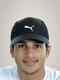

In [ ]:
Image(inputImage)

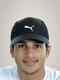

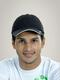

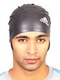

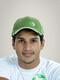

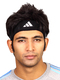

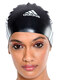

In [ ]:
for index in indices[0]:
    display(Image(filenames[index]))

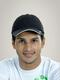

In [ ]:
Image(filenames[indices[0][1]])


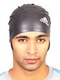

In [ ]:
Image(filenames[indices[0][2]])


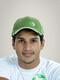

In [ ]:
Image(filenames[indices[0][3]])


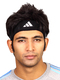

In [ ]:
Image(filenames[indices[0][4]])


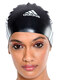

In [ ]:
Image(filenames[indices[0][5]])